<center>
    <img src="https://image.shutterstock.com/image-vector/regression-concept-keywords-people-icons-260nw-1820291330.jpg" width="600" alt="cognitiveclass.ai logo"  />
</center>

# Simple Linear Regression : BFP & Petrol Price


In [21]:
#Import neccesary libries
import pandas as pd 
import numpy as np

#Load and create a new column
dataset = pd.read_excel('BFP.xlsx', sheet_name='Combined')
dataset['Crude_Rands'] = (dataset.Avg_Brent_Crude * dataset.Ex_Rate)
dataset.head()

,Date,BFP,Ex_Rate,Avg_Brent_Crude,Petrol,Crude_Rands
0,2010-01-01,406.263,7.5246,74.31,786.0,559.153026
1,2010-02-01,424.263,7.4735,76.84,804.0,574.263740
2,2010-03-01,430.563,7.6902,73.17,810.3,562.691934
3,2010-04-01,453.063,7.4753,78.89,858.3,589.726417
4,2010-05-01,465.063,7.3749,85.75,871.8,632.397675


### Data Visualization

In [22]:
import plotly.express as px

fig = px.histogram(dataset, x="Crude_Rands" , nbins=10, title="Feature", width=800, height=400)
fig1 = px.histogram(dataset, x="BFP" , nbins=10, title="Label A", width=800, height=400)
fig2 = px.histogram(dataset, x="Petrol" , nbins=10, title="Label B", width=800, height=400)
fig.show()
fig1.show()
fig2.show() 


<AxesSubplot:ylabel='Petrol'>

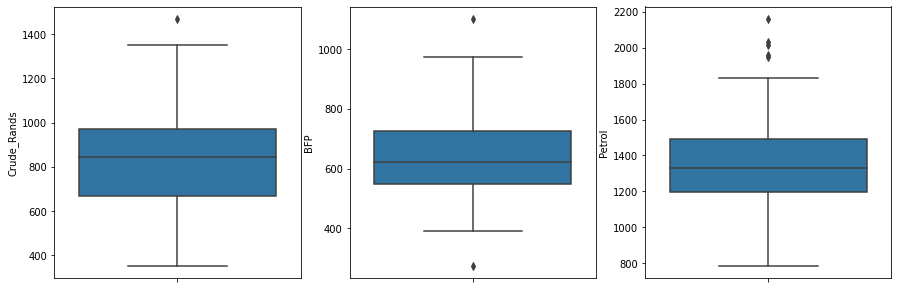

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns 
#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(1, 3, figsize=(15,5))

#create chart in each subplot
sns.boxplot(data=dataset, y='Crude_Rands', ax=axes[0])
sns.boxplot(data=dataset, y='BFP', ax=axes[1])
sns.boxplot(data=dataset, y='Petrol', ax=axes[2])

<AxesSubplot:xlabel='Petrol', ylabel='Count'>

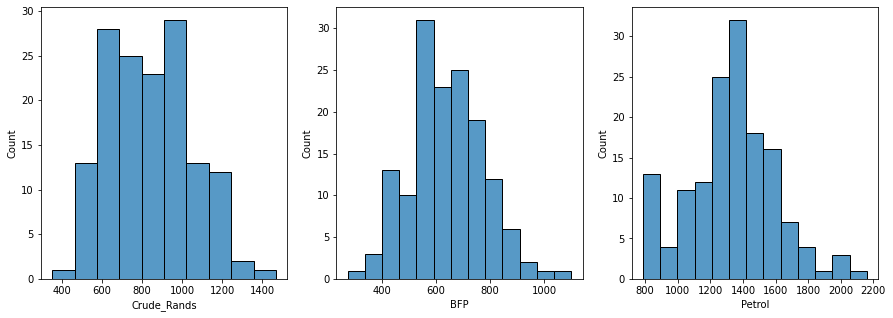

In [24]:
#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(1, 3, figsize=(15,5))

#create chart in each subplot
sns.histplot(data=dataset, x='Crude_Rands', ax=axes[0])
sns.histplot(data=dataset, x='BFP', ax=axes[1])
sns.histplot(data=dataset, x='Petrol', ax=axes[2])

Text(0.5, 1.0, 'Oil Price(Rand) vs Petrol Price')

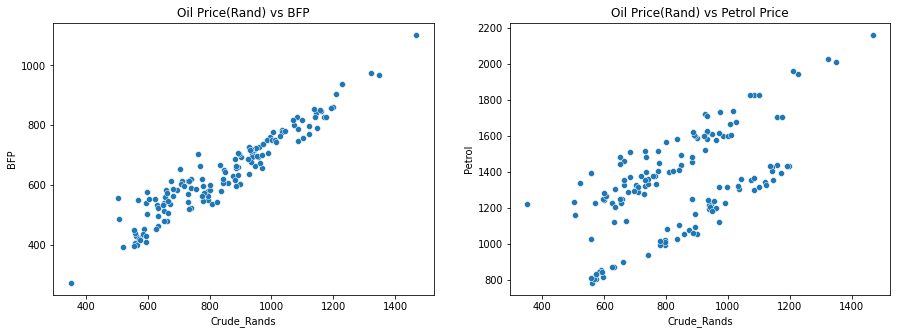

In [25]:
#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(1, 2, figsize=(15,5))

#create chart in each subplot
sns.scatterplot(data=dataset, x='Crude_Rands',y='BFP', ax=axes[0])
axes[0].set_title('Oil Price(Rand) vs BFP')


sns.scatterplot(data=dataset, x='Crude_Rands', y='Petrol', ax=axes[1])
axes[1].set_title('Oil Price(Rand) vs Petrol Price')


### Simple Linear Regression

1. BFP

In [26]:
import plotly.express as px

#Show a graph of the result
fig = px.scatter(dataset, x='Crude_Rands', y='BFP', trendline='ols', trendline_color_override='red', title= 'BFP vs Crude Oil (Rands)')
fig.show()


In [27]:
import statsmodels.formula.api as smf
# First, we define our formula using a special syntax
# This says BFP is explained by Oil_Rand
formula = "BFP ~ Crude_Rands"

# Perform linear regression. This method takes care of
# the entire fitting procedure for us.
model = smf.ols(formula = formula, data = dataset).fit()


# Lets do the same to Petrol Price
petrol_formula = 'Petrol ~ Crude_Rands'
petrol_model = smf.ols(formula = petrol_formula, data = dataset).fit()

print("R-squared: BFP", model.rsquared)
print("R-squared: Petrol Price", petrol_model.rsquared)

R-squared: BFP 0.9078394437852623
R-squared: Petrol Price 0.3967854491249848


2. Petrol

In [28]:
fig = px.scatter(dataset, x='Crude_Rands', y='Petrol', trendline='ols', trendline_color_override='red')
fig.show()

In [29]:
results = px.get_trendline_results(fig)
results = results.iloc[0]['px_fit_results'].summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     95.38
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           1.26e-17
Time:                        12:35:28   Log-Likelihood:                -997.19
No. Observations:                 147   AIC:                             1998.
Df Residuals:                     145   BIC:                             2004.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        621.6683     75.241      8.262      0.0

Using Seaborn Graphing

<AxesSubplot:xlabel='Crude_Rands', ylabel='Petrol'>

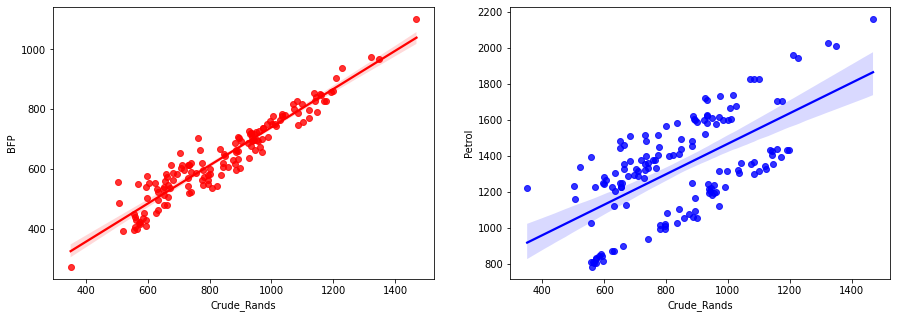

In [30]:
# Show a graph of the result
fig, axes = plt.subplots(1, 2, figsize=(15,5))


sns.regplot(data = dataset, x="Crude_Rands", y="BFP", color='red', ax=axes[0])

sns.regplot(data = dataset, x="Crude_Rands", y="Petrol", color='blue', ax=axes[1])


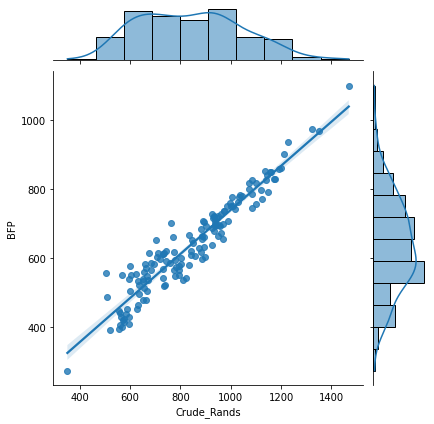

In [31]:
sns.jointplot(data = dataset, x="Crude_Rands", y="BFP", kind="reg")


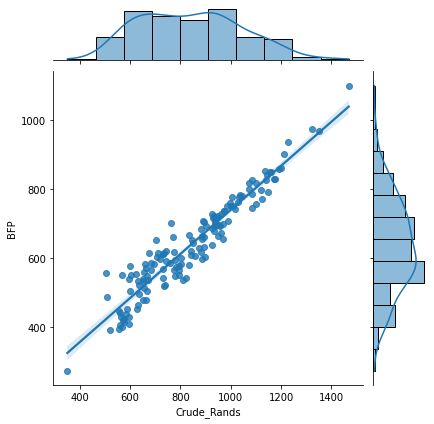

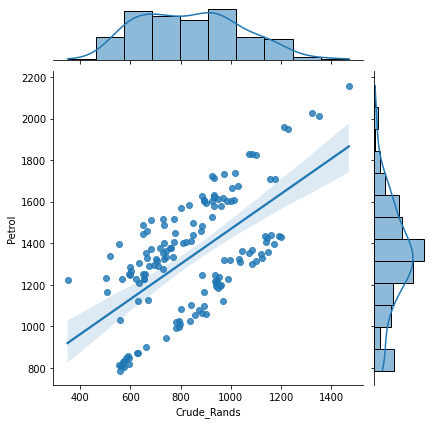

In [32]:
# Show a graph of the result
sns.jointplot(data = dataset, x="Crude_Rands", y="BFP", kind="reg", ax=axes[0])

sns.jointplot(data = dataset, x="Crude_Rands", y="Petrol", kind="reg", ax=axes[1])


### Interpreting our model

In [33]:
print("Intercept for BFP Model:", model.params[0], "Slope:", model.params[1])
print("Intercept for Petrol Model:", petrol_model.params[0], "Slope:", petrol_model.params[1])

Intercept for BFP Model: 102.27204838363235 Slope: 0.6378674961030573
Intercept for Petrol Model: 621.6683389822115 Slope: 0.8470501011057291


#### Estimating BFP

In [34]:
def estimate_bfp(Crude_Rands):
    # Model param[0] is the intercepts and param[1] is the slope
    return Crude_Rands * model.params[1] + model.params[0]

print("Estimate BFP from Oil Price")
print(estimate_bfp(Crude_Rands=1827.24))

Estimate BFP from Oil Price
1267.8090519629827


Estimated BFP Increase/Decrease

In [35]:
estimate_bfp(Crude_Rands=1827.24) - dataset['BFP'].iloc[-1]

167.53905196298274

#### Estimating Petrol Price

In [36]:
def estimate_petrol(Crude_Rands):
    # Model param[0] is the intercepts and param[1] is the slope
    return Crude_Rands * petrol_model.params[1] + petrol_model.params[0]

print("Estimate Petrol Price from Oil Price")
print(estimate_petrol(Crude_Rands=1827.87))

Estimate Petrol Price from Oil Price
2169.9658072903403


Estimated Petrol Price Increase/Decrease

In [37]:
estimate_petrol(Crude_Rands=1827.87) - dataset['Petrol'].iloc[-1]

10.465807290340308

# Using Sklearn

Creating train and test dataset

In [38]:
cdf = dataset[['Crude_Rands', 'BFP']]

In [39]:
msk = np.random.rand(len(dataset)) < 0.8
train = cdf[msk]
test = cdf[~msk]

Simple Linear Regression Model

In [40]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Crude_Rands']])
train_y = np.asanyarray(train[['BFP']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.6452754]]
Intercept:  [96.48156636]


In [43]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Crude_Rands']])
test_y = np.asanyarray(test[['BFP']])
test_y_ = regr.predict(test_x)

print("MSE: %.2f" % np.mean((test_y_ - test_y) ** 2))
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("R-Squared: %.2f" % r2_score(test_y , test_y_) )

MSE: 1767.62
Mean absolute error: 33.70
R-Squared: 0.89
